### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff

### Importing DataSet and gaining some Information

In [2]:
# Importing dataset and examining it
dataset = pd.read_csv("Clients.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   age           job  marital  education default  balance housing personal  \
0   58    management  married   tertiary      no     2143     yes       no   
1   44    technician   single  secondary      no       29     yes       no   
2   33  entrepreneur  married  secondary      no        2     yes      yes   
3   35    management  married   tertiary      no      231     yes       no   
4   28    management   single   tertiary      no      447     yes      yes   

  term  
0   no  
1   no  
2   no  
3   no  
4   no  
(43193, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        43193 non-null  int64 
 1   job        43193 non-null  object
 2   marital    43193 non-null  object
 3   education  43193 non-null  object
 4   default    43193 non-null  object
 5   balance    43193 non-null  int64 
 6   housing    43193 non-null  object
 7   pe

### Converting Categorical Data into Numeric

In [3]:
# Converting Categorical features into Numerical features
dataset['job'] = dataset['job'].map({'admin.':0, 'blue-collar':1, 'entrepreneur':2, 'housemaid':3, 'management':4, 'retired':5, 'self-employed':6, 'services':7, 'student':8, 'technician':9, 'unemployed':10})
dataset['marital'] = dataset['marital'].map({'divorced':0, 'married':1, 'single':2})
dataset['education'] = dataset['education'].map({'primary':0, 'secondary':1, 'tertiary':2})
dataset['default'] = dataset['default'].map({'no':0, 'yes':1 })
dataset['housing'] = dataset['housing'].map({'no':0, 'yes':1})
dataset['personal'] = dataset['personal'].map({'no':0, 'yes':1})
dataset['term'] = dataset['term'].map({'no':0, 'yes':1})

### Correlation and Causation

In [4]:
print(dataset.info())
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
offline.plot(figure,filename='corrheatmap.html')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43193 non-null  int64
 1   job        43193 non-null  int64
 2   marital    43193 non-null  int64
 3   education  43193 non-null  int64
 4   default    43193 non-null  int64
 5   balance    43193 non-null  int64
 6   housing    43193 non-null  int64
 7   personal   43193 non-null  int64
 8   term       43193 non-null  int64
dtypes: int64(9)
memory usage: 3.0 MB
None


'corrheatmap.html'

### Divding the Variables into Subsets

In [6]:
X = dataset
#Personal Data
subset1 = X[['age','job','marital','education']]

#Loan Data
subset2 = X[['age','balance','housing','personal','term','default']]

### Normalizing the numeric variables of subsets

In [7]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)

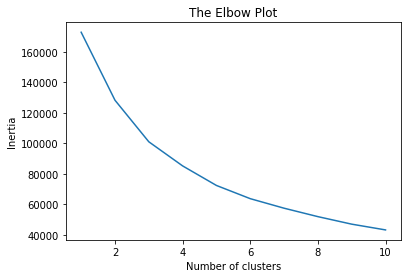

In [9]:
# Analysis on subset1 - Personal Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X1)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


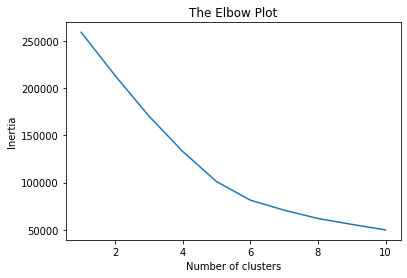

In [10]:
# Analysis on subset2 - Loan Data
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [11]:
# Running KMeans to generate labels for X1
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X1)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
# Running KMeans to generate labels for X2
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X2)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### T-SNE for X1

In [13]:
# Implementing t-SNE to visualize dataset for X1
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X1)

age = list(X['age'])
job = list(X['job'])
marital = list(X['marital'])
education = list(X['education'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'age: {a}; job: {b}; marital:{c}; education:{d}' for a,b,c,d in list(zip(age,job,marital,education))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE1.html')


't-SNE1.html'

### T-SNE for X2

In [15]:
# Implementing t-SNE to visualize dataset for X2
tsne = TSNE(n_components = 2, perplexity =30,n_iter=2000)
x_tsne = tsne.fit_transform(X2)

age = list(X['age'])
balance = list(X['balance'])
housing = list(X['housing'])
personal = list(X['personal'])
term = list(X['term'])
default = list(X['default'])

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'age: {a}; balance: {b}; housing:{c}; personal:{d}; term:{e};default:{f}' for a,b,c,d,e,f in list(zip(age,balance,housing,personal,term,default))],
                                hoverinfo='text')]

layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE1.html')


't-SNE1.html'